In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from PIL import Image

In [3]:
%matplotlib inline

In [4]:
main_path = "/content/gdrive/My Drive/Remote LSTM"
sub_paths = ["LostCreek_site_MI", "NE3_Site_NE", "TonziRanch_site_CA", "WalnutGulchWatershed_AZ"]

In [5]:
 def display_images(my_images):
    row, col = 15, 6
    my_images = my_images[-1 * row * col:]
    my_images = np.reshape(my_images, (my_images.shape[0], my_images.shape[1], my_images.shape[2]))
    _, ax = plt.subplots(row, col, figsize=(col * 4, row * 4))
    for i, image in enumerate(my_images):
        ax[i // col, i % col].imshow(image, vmin=0, vmax=1)
        ax[i // col, i % col].title.set_text(f"{i + 1}")
        ax[i // col, i % col].axis("off")
    plt.show()
    plt.close()

In [6]:
def provide_info(data_path):
    box = os.listdir(f"{main_path}/MODIS Data/MODIS_LE_US_{data_path}")

    potato = [date[23:27] for date in box]
    yr_list= list(set(potato))
    yr_list.sort()
    print(f"Data distribution\nYear\tCount")
    for yr in yr_list:
        cc = potato.count(yr)
        print(f"{yr}\t{cc}")
    print("\n\n\n")

    data = []
    threshold = 32000

    for n in box:
        im = Image.open(f"{main_path}/MODIS Data/MODIS_LE_US_{data_path}/{n}")
        map = np.array(im)
        map = np.reshape(map, (map.shape[0], map.shape[1], 1))

        i = map > threshold
        map[i] = 0

        data.append(map)
    
    data = np.array(data)

    print(f"Max\t{data.max()}")
    print(f"Min\t{data.min()}")
    print(f"Mean\t{data.mean()}")
    print(f"99.9\t{np.percentile(data, 99.9)}")
    print(f"99.95\t{np.percentile(data, 99.95)}")
    print(f"99.99\t{np.percentile(data, 99.99)}")

    scale = np.percentile(data, 99.9)
    data = data / scale

    print(f"\nData shape = {data.shape}")

    return data

# LostCreek_site_MI

In [7]:
data = provide_info(sub_paths[0])

Data distribution
Year	Count
2001	45
2002	46
2003	46
2004	46
2005	46
2006	46
2007	46
2008	42
2009	46
2010	46
2011	46
2012	46
2013	46
2014	46
2015	46
2016	46
2017	46
2018	46
2019	46
2020	1




Max	2158
Min	0
Mean	175.4496820366445
99.9	1556.0
99.95	1630.2955000000075
99.99	1761.0

Data shape = (870, 31, 53, 1)


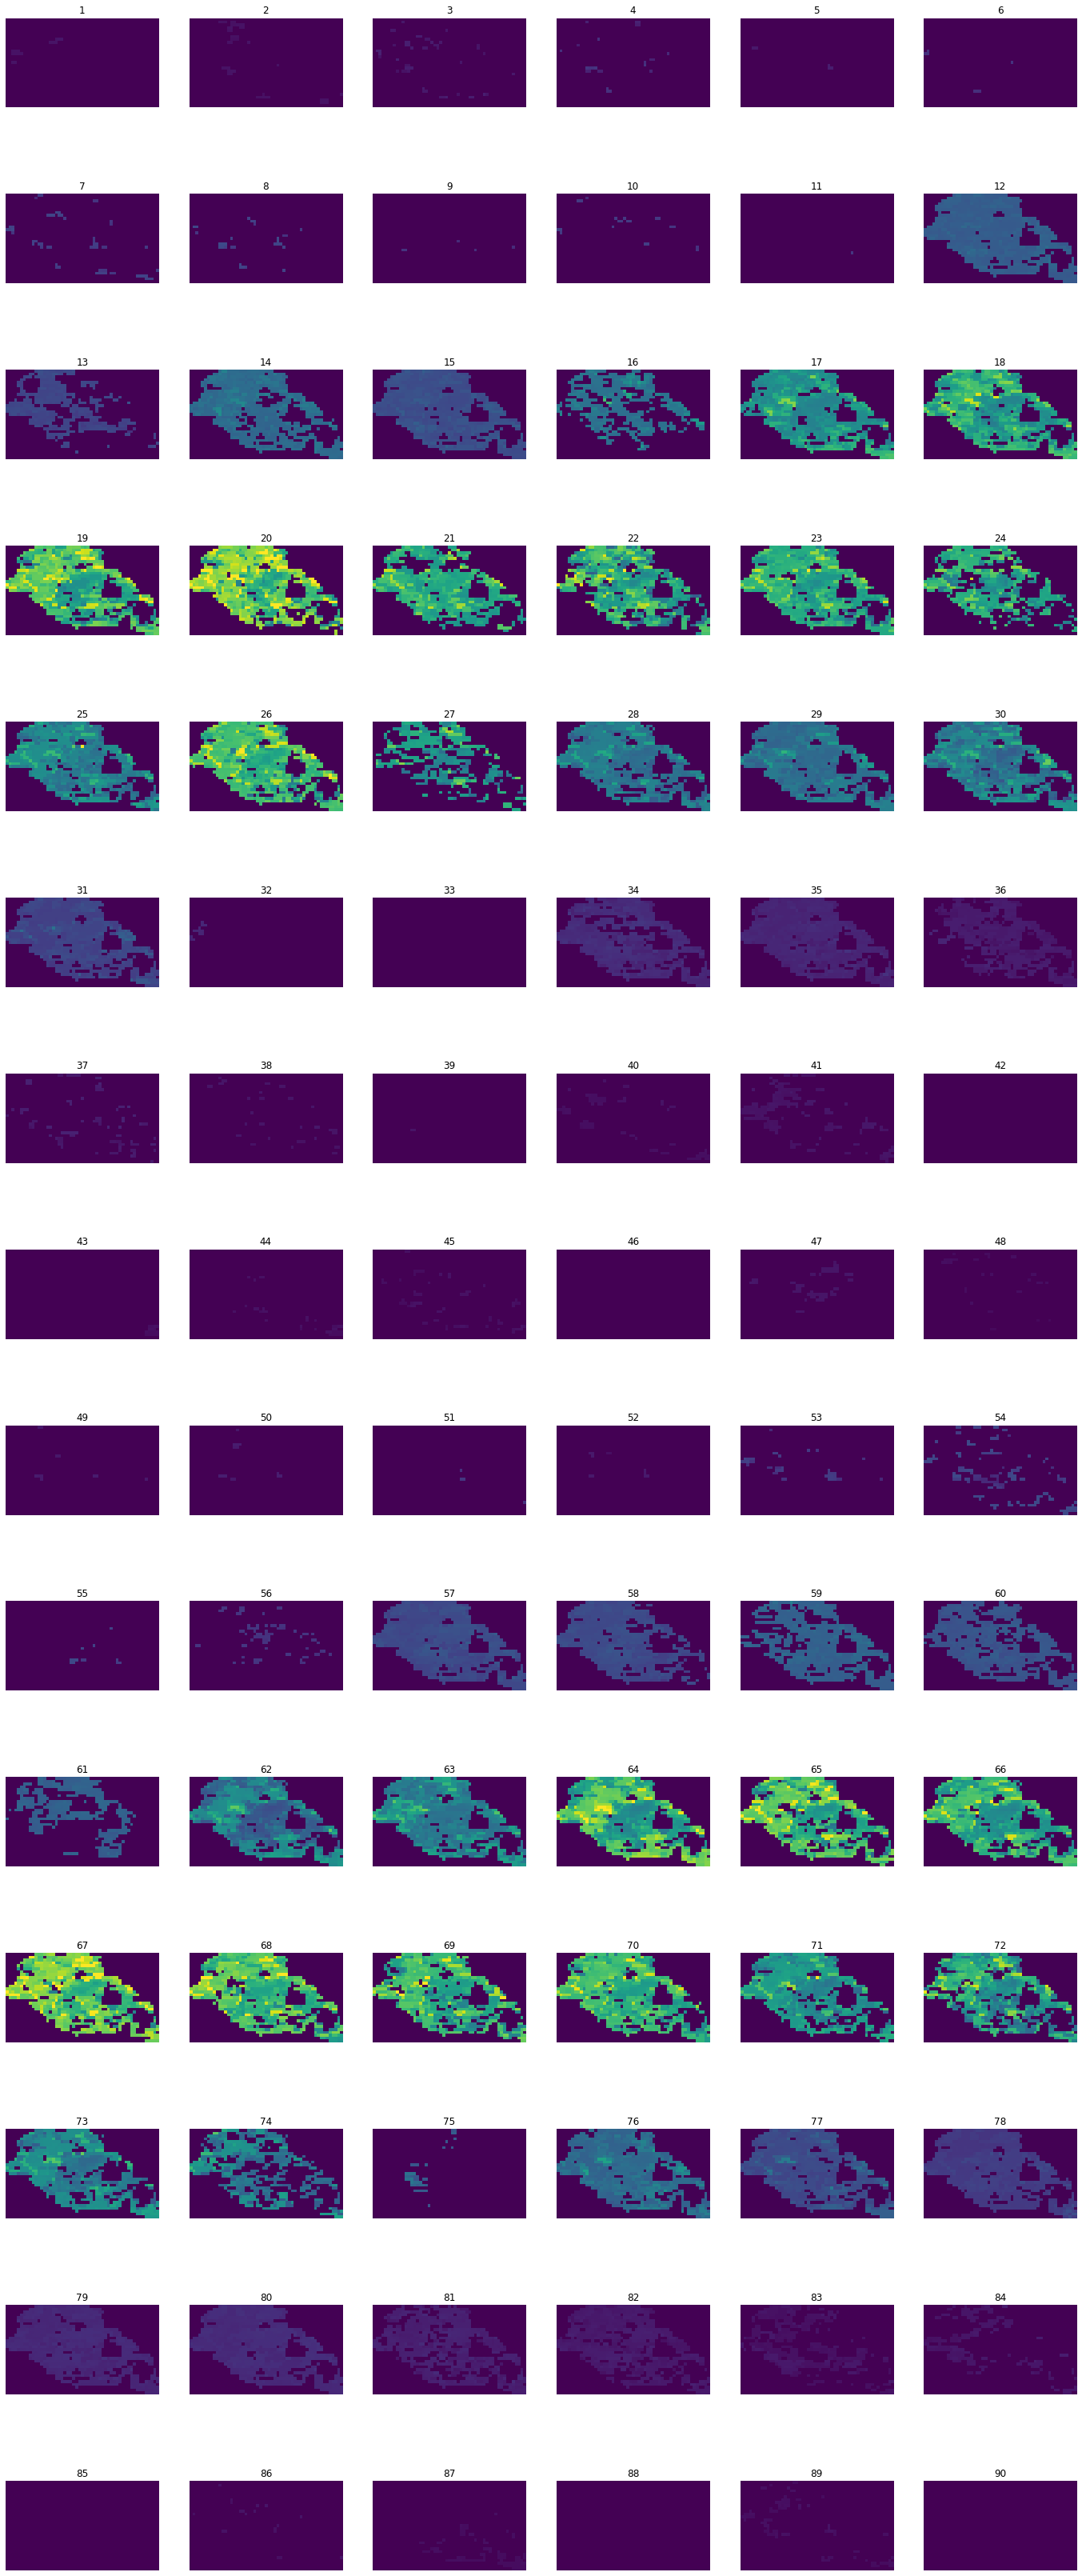

In [8]:
display_images(data)

# NE3_Site_NE

In [9]:
data = provide_info(sub_paths[1])

Data distribution
Year	Count
2001	45
2002	46
2003	46
2004	46
2005	46
2006	46
2007	46
2008	43
2009	46
2010	46
2011	46
2012	46
2013	46
2014	46
2015	46
2016	46
2017	46
2018	46
2019	46
2020	1




Max	2006
Min	0
Mean	138.87282497162414
99.9	1630.0
99.95	1715.9835000000894
99.99	1868.0

Data shape = (871, 34, 31, 1)


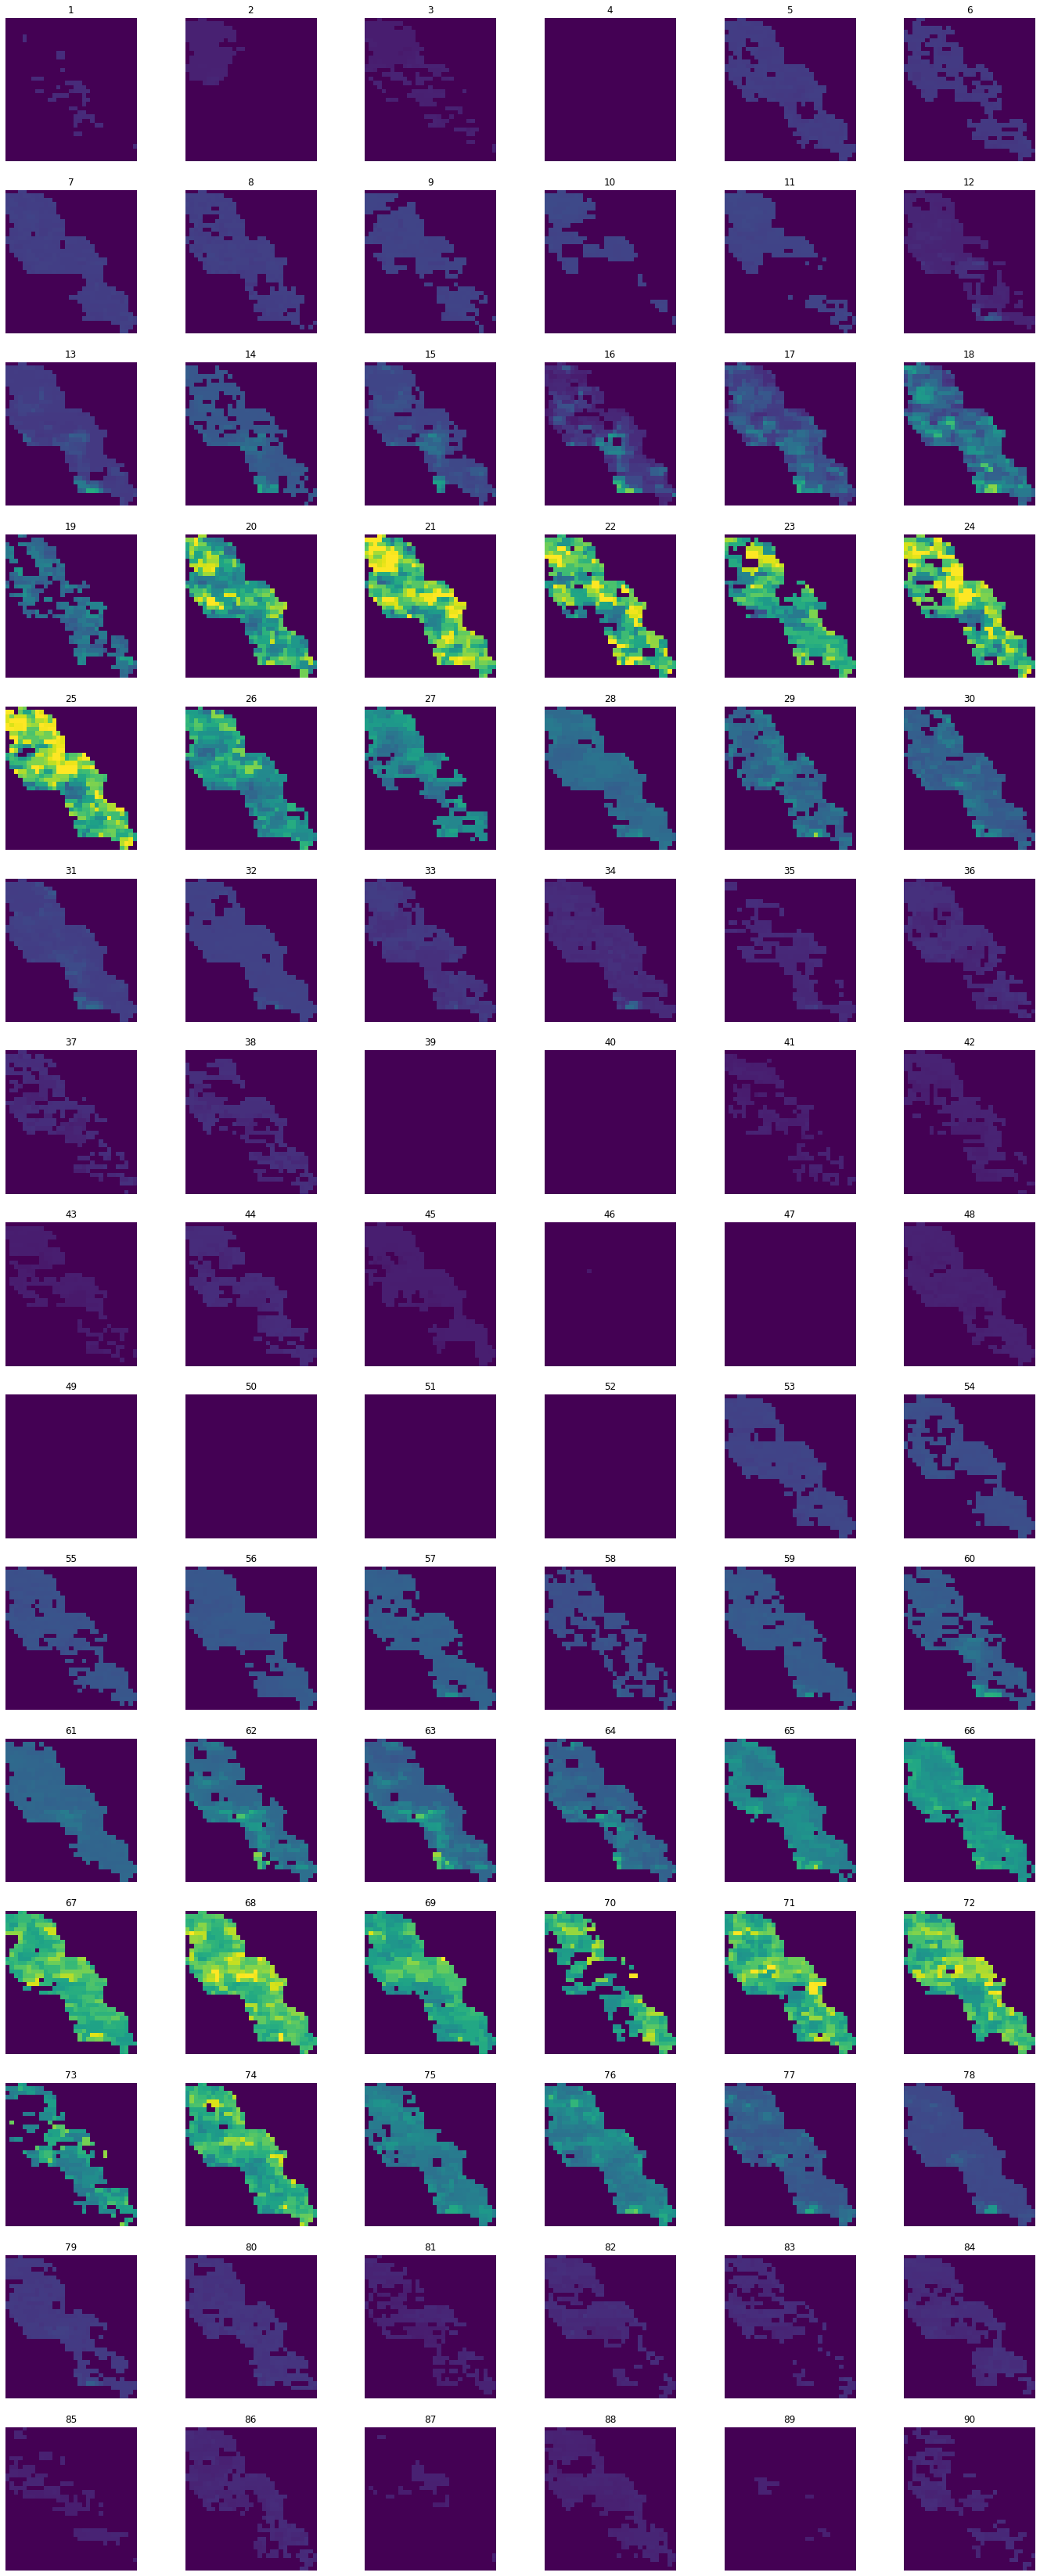

In [10]:
display_images(data)

# TonziRanch_site_CA

In [11]:
data = provide_info(sub_paths[2])

Data distribution
Year	Count
2001	45
2002	46
2003	46
2004	46
2005	46
2006	46
2007	46
2008	42
2009	46
2010	46
2011	46
2012	46
2013	46
2014	46
2015	46
2016	46
2017	46
2018	46
2019	46
2020	1




Max	1632
Min	0
Mean	106.37769990004998
99.9	986.0
99.95	1052.0
99.99	1226.0

Data shape = (870, 20, 46, 1)


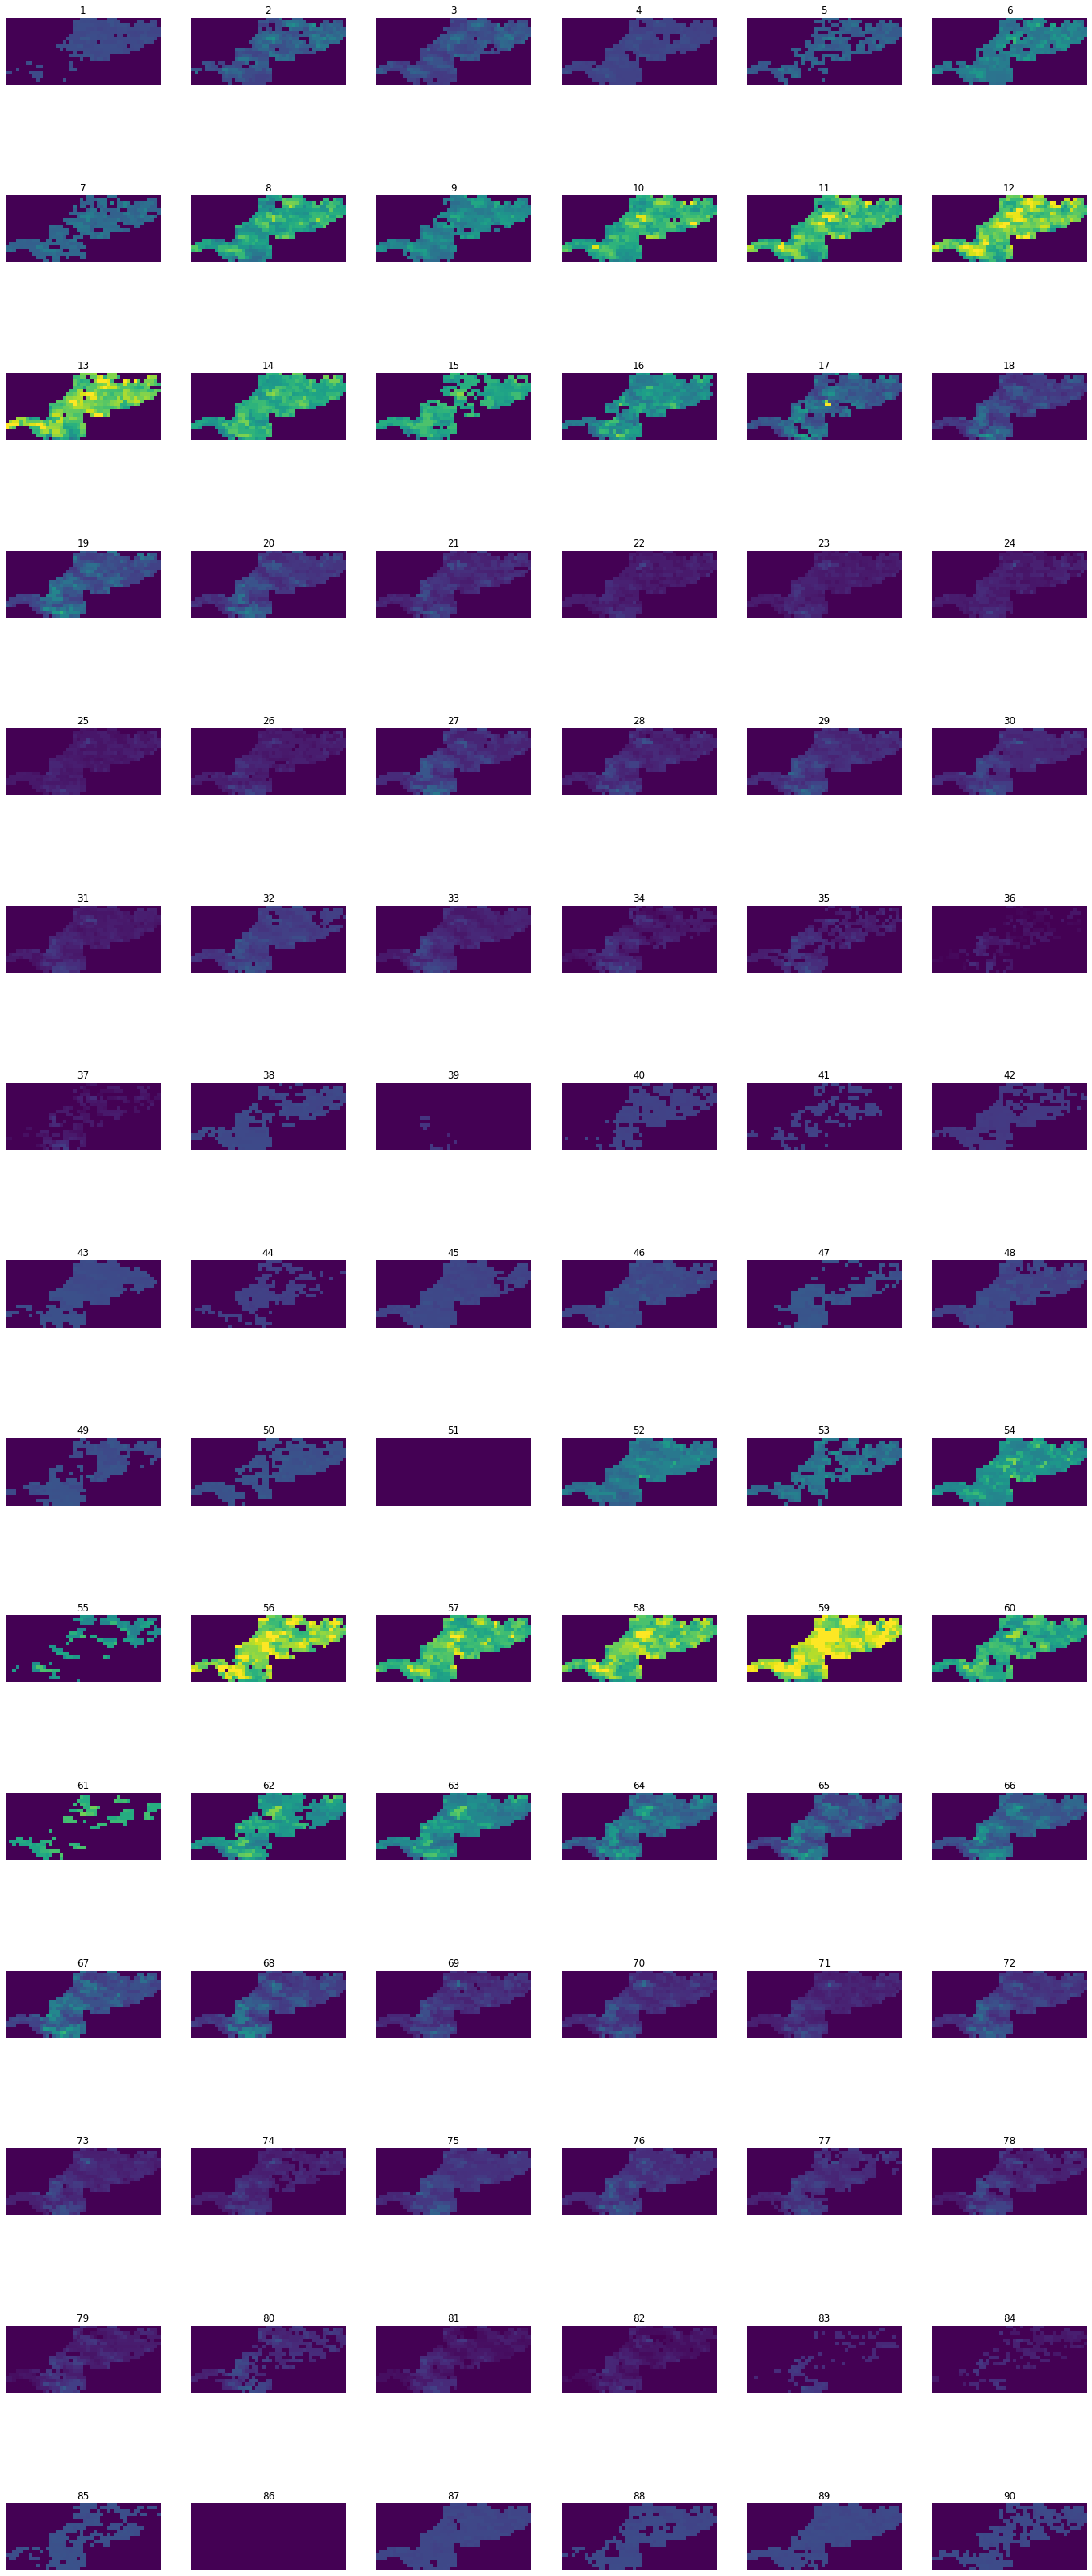

In [12]:
display_images(data)

# WalnutGulchWatershed_AZ

In [13]:
data = provide_info(sub_paths[3])

Data distribution
Year	Count
2002	23
2003	46
2004	46
2005	46
2006	46
2007	46
2008	46
2009	46
2010	46
2011	46
2012	46
2013	46
2014	46
2015	45
2016	46
2017	46
2018	46
2019	46




Max	1214
Min	0
Mean	37.06032623906872
99.9	380.0
99.95	430.0
99.99	553.9432999999262

Data shape = (804, 26, 67, 1)


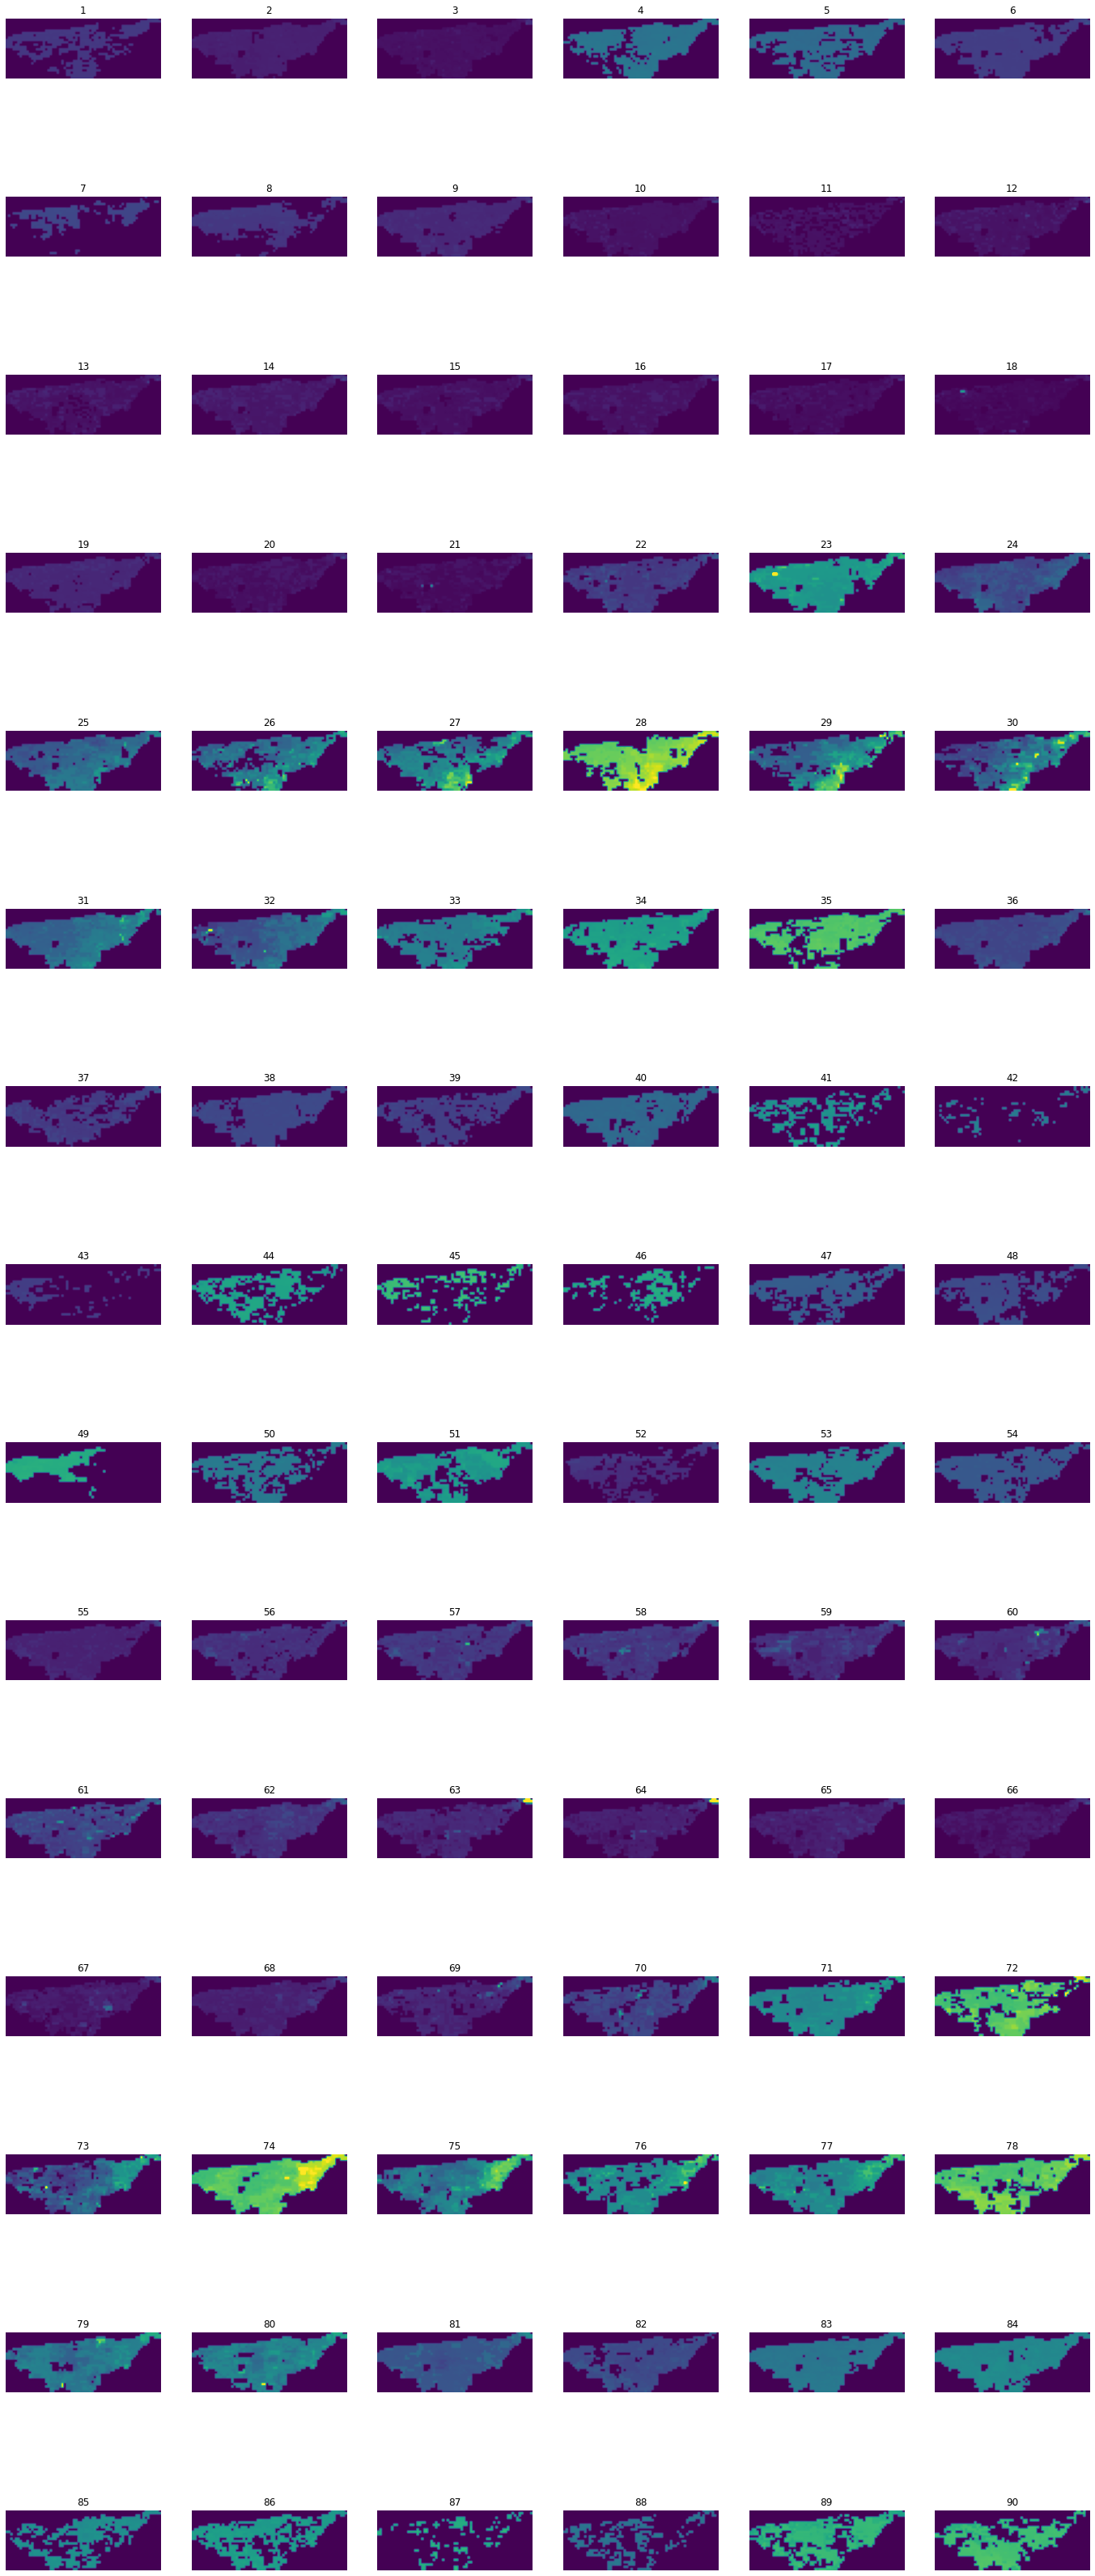

In [14]:
display_images(data)

# THE END

---

